In [3]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy.cluster.hierarchy import dendrogram, linkage  
import plotly.graph_objects as go  

In [24]:
import pandas as pd  
  
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',encoding='ansi')

In [70]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [26]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation  ', 'Sleep Duration 睡眠时间',
       'Quality of Sleep 睡眠质量', 'Physical Activity Level 物理活动水平',
       'Stress Level 压力水平', 'BMI Category 生物质量指数类别', 'Blood Pressure 血压',
       'Heart Rate 心率', 'Daily Steps 今日步数', 'Sleep Disorder 睡眠障碍'],
      dtype='object')

In [27]:
import re  
# 使用正则表达式替换含有中文的列名  
def remove_chinese_characters(column_name):  
    return re.sub(r'[\u4e00-\u9fff]+', '', column_name)  # 使用正则表达式匹配中文字符并替换为空字符串  
  
# 使用字典推导式重命名列名  
data = data.rename(columns={name: remove_chinese_characters(name) for name in data.columns})  
  
# 打印修改后的 DataFrame 列名  
print(data.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation  ', 'Sleep Duration ',
       'Quality of Sleep ', 'Physical Activity Level ', 'Stress Level ',
       'BMI Category ', 'Blood Pressure ', 'Heart Rate ', 'Daily Steps ',
       'Sleep Disorder '],
      dtype='object')


In [69]:
data['Sleep Disorder ']=data['Sleep Disorder '].fillna('None')

In [36]:
import matplotlib.pyplot as plt  
import seaborn as sns  
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

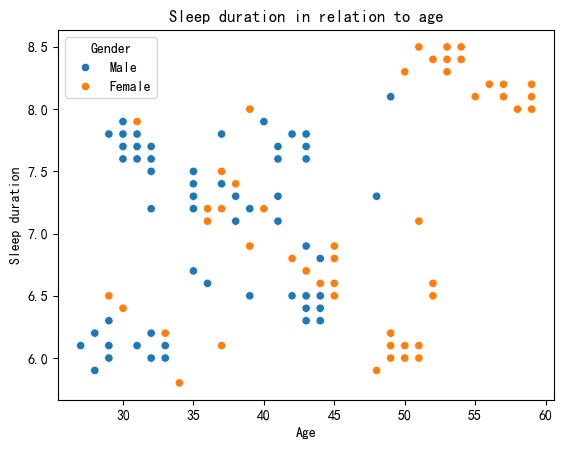

In [37]:
# 绘制散点图  
sns.scatterplot(data=data, x='Age', y='Sleep Duration ', hue='Gender')  
plt.title('Sleep duration in relation to age')  
plt.xlabel('Age')  
plt.ylabel('Sleep duration')  
plt.show()  

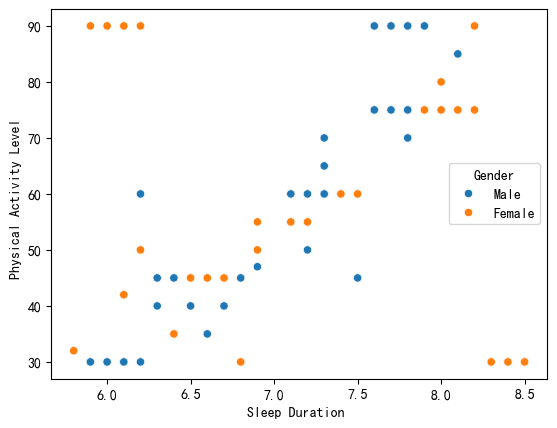

In [22]:
sns.scatterplot(data=data, x='Sleep Duration ', y='Physical Activity Level ', hue='Gender')  
plt.show()

In [78]:
from pyecharts import options as opts  
from pyecharts.charts import Tree  

In [45]:
ndata=data[['Age','Sleep Duration ',
       'Quality of Sleep ', 'Physical Activity Level ', 'Stress Level ',
        'Heart Rate ', 'Daily Steps ']]

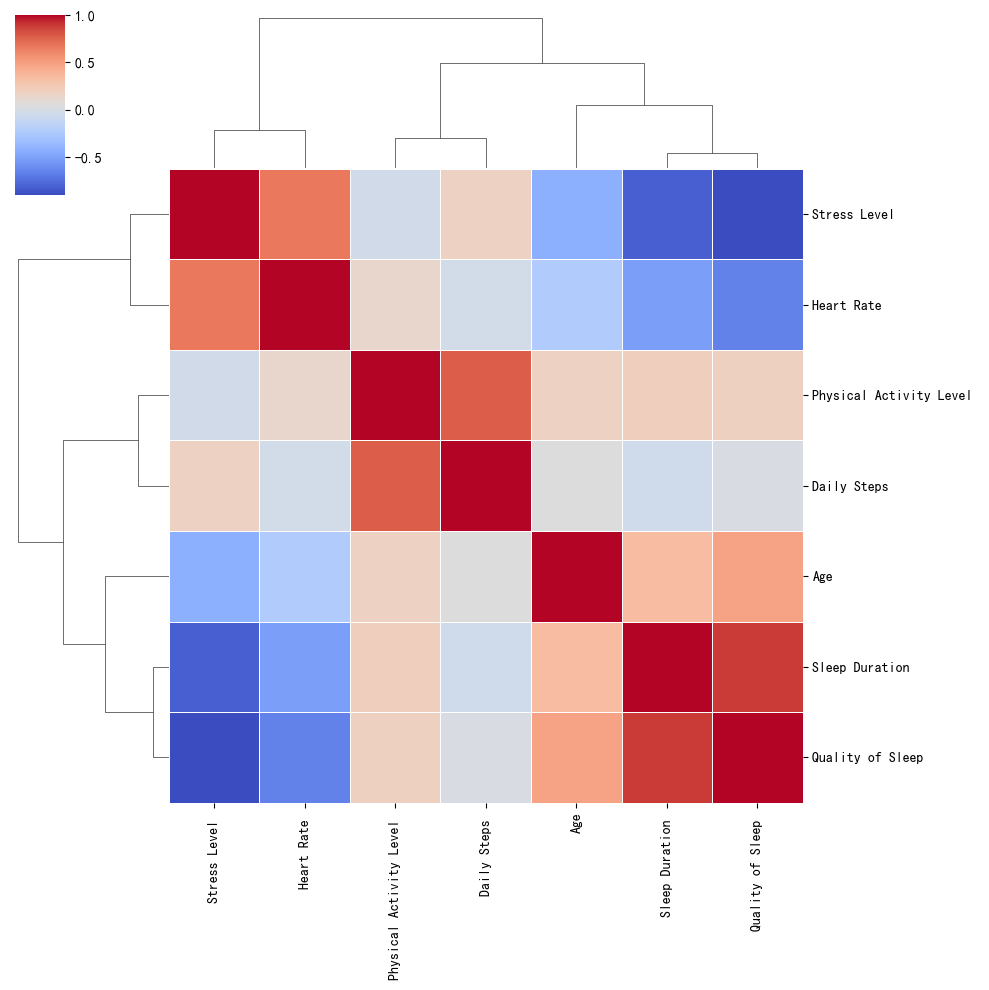

In [46]:
# 计算相关性  
corr = ndata.corr()  
  
# 绘制层次聚类热图  
sns.clustermap(corr, cmap='coolwarm', linewidths=0.5, figsize=(10,10))  
plt.show()

In [71]:
subset = data[['BMI Category ', 'Sleep Disorder ','Sleep Duration ']]

In [72]:
nodes=[]
for i in range(2):
    vales=subset.iloc[:,i].unique()
    for value in vales:
        dic={}
        dic['name']=value
        nodes.append(dic)
print(nodes)

[{'name': 'Overweight'}, {'name': 'Normal'}, {'name': 'Obese'}, {'name': 'Normal Weight'}, {'name': 'None'}, {'name': 'Sleep Apnea'}, {'name': 'Insomnia'}]


In [73]:
linkes=[]
for i in subset.values:
    dic={}
    dic['source']=i[0]
    dic['target']=i[1]
    dic['value']=i[2]
    linkes.append(dic)

In [74]:
linkes

[{'source': 'Overweight', 'target': 'None', 'value': 6.1},
 {'source': 'Normal', 'target': 'None', 'value': 6.2},
 {'source': 'Normal', 'target': 'None', 'value': 6.2},
 {'source': 'Obese', 'target': 'Sleep Apnea', 'value': 5.9},
 {'source': 'Obese', 'target': 'Sleep Apnea', 'value': 5.9},
 {'source': 'Obese', 'target': 'Insomnia', 'value': 5.9},
 {'source': 'Obese', 'target': 'Insomnia', 'value': 6.3},
 {'source': 'Normal', 'target': 'None', 'value': 7.8},
 {'source': 'Normal', 'target': 'None', 'value': 7.8},
 {'source': 'Normal', 'target': 'None', 'value': 7.8},
 {'source': 'Normal', 'target': 'None', 'value': 6.1},
 {'source': 'Normal', 'target': 'None', 'value': 7.8},
 {'source': 'Normal', 'target': 'None', 'value': 6.1},
 {'source': 'Normal', 'target': 'None', 'value': 6.0},
 {'source': 'Normal', 'target': 'None', 'value': 6.0},
 {'source': 'Normal', 'target': 'None', 'value': 6.0},
 {'source': 'Normal Weight', 'target': 'Sleep Apnea', 'value': 6.5},
 {'source': 'Normal', 'target

In [75]:
from pyecharts.charts import Sankey  
from collections import Counter  
from pyecharts import options as opts
  
sankey = (  
    Sankey()  
    .add(  
        '',#图例名称
        nodes,#传入节点数据
        linkes,#传入边和流量数据
        #设置透明度、弯曲度、颜色
        linestyle_opt=opts.LineStyleOpts(opacity=0.3,curve=0.5,color='source'),
        #标签显示位置
        label_opts=opts.LabelOpts(position='right'),
        #节点之间的距离
        node_gap=30,  
    )  
    .set_global_opts(title_opts=opts.ComponentTitleOpts(title="Sankey diagram of BMI categories and sleep disorders"))  
)  
sankey.render("sankey_chart.html")

'D:\\file\\xianyu\\tt\\sankey_chart.html'